In [1]:
from astropy.time import Time
from astropy.visualization import time_support

import numpy as np
import matplotlib.pyplot as plt
import os

from ctapointing.database import provide_image_db
from ctapointing.exposure import Exposure

#### Count all images in collection:

In [2]:
with provide_image_db() as db:
    collection = db["MAGIC-Campaign"]
    
    result = collection.count_documents({})

print(f"found {result} images.")

found 75452 images.


#### Select those images for which the exposure is 10 seconds:

In [3]:
with provide_image_db() as db:
    collection = db["MAGIC-Campaign"]

    result = collection.find({'exposure_duration': 10}).limit(10)

for r in result:
    print(r['uuid'], r['filename'], r['exposure_start'], r['exposure_duration'])

c451560f-5550-4c79-bdd4-5ba52a2610f9 image_1530743147_with_uuid.fits.gz 2018-07-04T22:25:47.748 10.0
9bd2b5ed-759b-46ae-bd8e-43a53412ad6d image_1530850405_with_uuid.fits.gz 2018-07-06T04:13:25.810 10.0
4ced4022-9eaa-43c0-82fa-ca24521da72b image_1530856188_with_uuid.fits.gz 2018-07-06T05:49:48.154 10.0
d93b8311-d3be-4032-bab7-8aa9c2989d40 image_1530912429_with_uuid.fits.gz 2018-07-06T21:27:09.109 10.0
1dcbead5-a17e-4475-be4d-b97a1d7e480a image_1530916924_with_uuid.fits.gz 2018-07-06T22:42:04.912 10.0
8f1c062f-3c70-4776-9822-654354bc3116 image_1530918691_with_uuid.fits.gz 2018-07-06T23:11:31.719 10.0
33f0789b-0388-45d8-89c4-bbb6e11ebe69 image_1530936065_with_uuid.fits.gz 2018-07-07T04:01:05.956 10.0
c72b002c-c421-451b-93a9-32de1a0f4044 image_1530940239_with_uuid.fits.gz 2018-07-07T05:10:39.482 10.0
890fd3b4-6ba2-42b3-91a9-3e6c67af0bfc image_1530940802_with_uuid.fits.gz 2018-07-07T05:20:02.179 10.0
7b1f75c6-2e75-498a-b9f3-356d5f12a3da image_1530999149_with_uuid.fits.gz 2018-07-07T21:32:29

#### Use `Exposure.select_from_collection` to select images:

In [4]:
image_list = Exposure.select_from_collection(selection_dict={"exposure_duration": 10},
                                             collection="MAGIC-Campaign",
                                             limit=10)
image_list.info

<Table length=10>
          name            dtype  n_bad
------------------------ ------- -----
                    uuid   str36     0
                filename   str34     0
     exposure_duration_s float64     0
          exposure_start   str23     0
          nominal_ra_deg float64     3
         nominal_dec_deg float64     3
   chip_temperature_degC float64     0
ambient_temperature_degC float64    10
            is_simulated    bool     0
           camera_config   str23     0
             moon_az_deg float64     0
            moon_alt_deg float64     0
              moon_phase float64     0
              sun_az_deg float64     0
             sun_alt_deg float64     0

#### Project from the image set exposure_start and chip_temperature and plot:

In [5]:
with provide_image_db() as db:
    collection = db["MAGIC-Campaign"]
    result = collection.find({})

exposure_start = []
chip_temperature = []
duration = []

for r in result:
    exposure_start.append(str(r['exposure_start']))
    chip_temperature.append(r['chip_temperature'])
    duration.append(r['exposure_duration'])
    
exposure_start = Time(exposure_start, format='fits', scale='utc')

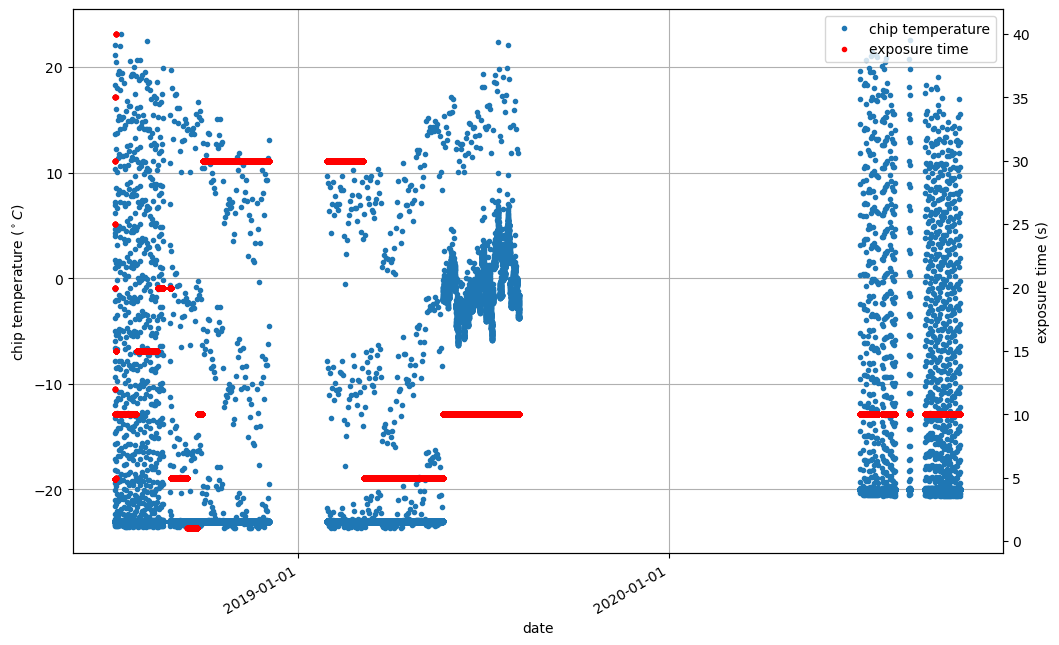

In [6]:
with time_support(format='isot', scale='utc'):
    
    fig, ax = plt.subplots(figsize=(12, 8))

    t, = ax.plot_date(exposure_start, chip_temperature, '.')
    ax.set_ylabel(r'chip temperature ($^\circ C$)')
    ax.set_xlabel('date')
    ax.grid()

    ax2 = ax.twinx()
    e, = ax2.plot_date(exposure_start, duration, 'r.')
    ax2.set_ylabel('exposure time (s)')

    plt.gcf().autofmt_xdate()
    plt.legend((t, e), ('chip temperature', 'exposure time'))
    
plt.show()